In [95]:
pip install pandas scikit-learn matplotlib seaborn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


## Part A: Data Preprocessing

In [96]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import accuracy_score,precision_score, recall_score, f1_score,roc_curve, auc
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [97]:
data = pd.read_csv('diabetes.csv')

In [98]:
print(data.head())

   Pregnancies  Glucose  BloodPressure  ...  DiabetesPedigreeFunction  Age  Outcome
0            6      148             72  ...                     0.627   50        1
1            1       85             66  ...                     0.351   31        0
2            8      183             64  ...                     0.672   32        1
3            1       89             66  ...                     0.167   21        0
4            0      137             40  ...                     2.288   33        1

[5 rows x 9 columns]


In [99]:
print(data.isnull().sum())

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [100]:
print(data.describe())

       Pregnancies     Glucose  ...         Age     Outcome
count   768.000000  768.000000  ...  768.000000  768.000000
mean      3.845052  120.894531  ...   33.240885    0.348958
std       3.369578   31.972618  ...   11.760232    0.476951
min       0.000000    0.000000  ...   21.000000    0.000000
25%       1.000000   99.000000  ...   24.000000    0.000000
50%       3.000000  117.000000  ...   29.000000    0.000000
75%       6.000000  140.250000  ...   41.000000    1.000000
max      17.000000  199.000000  ...   81.000000    1.000000

[8 rows x 9 columns]


In [101]:
X = data.drop('Outcome', axis=1)
y = data['Outcome'] 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


## Part B: Logistic Regression

In [102]:
model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train) 


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,200
,multi_class,'deprecated'


In [103]:
y_pred = model.predict(X_test)


In [104]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print("accuracy:",accuracy)
print("precision:",precision)
print("recall:",recall)
print("f1:",f1)

accuracy: 0.7359307359307359
precision: 0.6172839506172839
recall: 0.625
f1: 0.6211180124223602


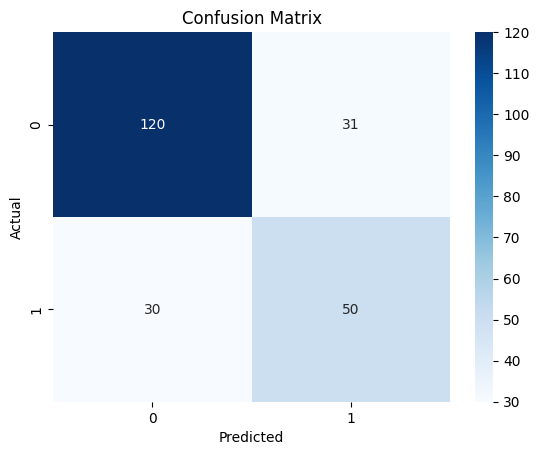

In [105]:
conf_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

Text(0.5, 1.0, 'ROC CURVE')

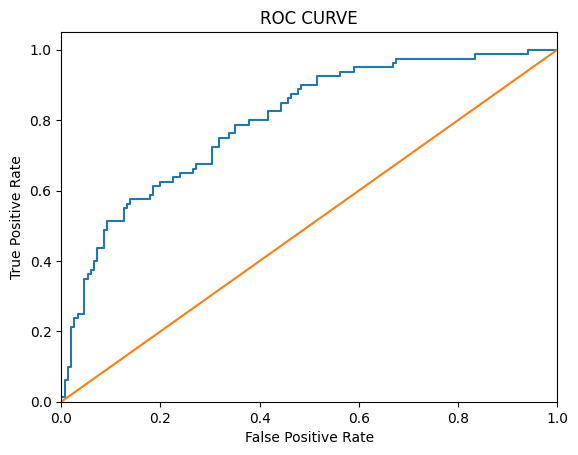

In [106]:
y_prob = model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr,label= roc_auc)
plt.plot([0, 1], [0, 1])
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE')


## Part C: Decision Tree Classifier

In [107]:
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier(max_depth=4, random_state=42)
dt_model.fit(X_train, y_train)


,criterion,'gini'
,splitter,'best'
,max_depth,4
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [108]:
y_pred = model.predict(X_test)


In [109]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print("accuracy:",accuracy)
print("arecision:",precision)
print("recall:",recall)
print("f1:",f1)

accuracy: 0.7359307359307359
arecision: 0.6172839506172839
recall: 0.625
f1: 0.6211180124223602


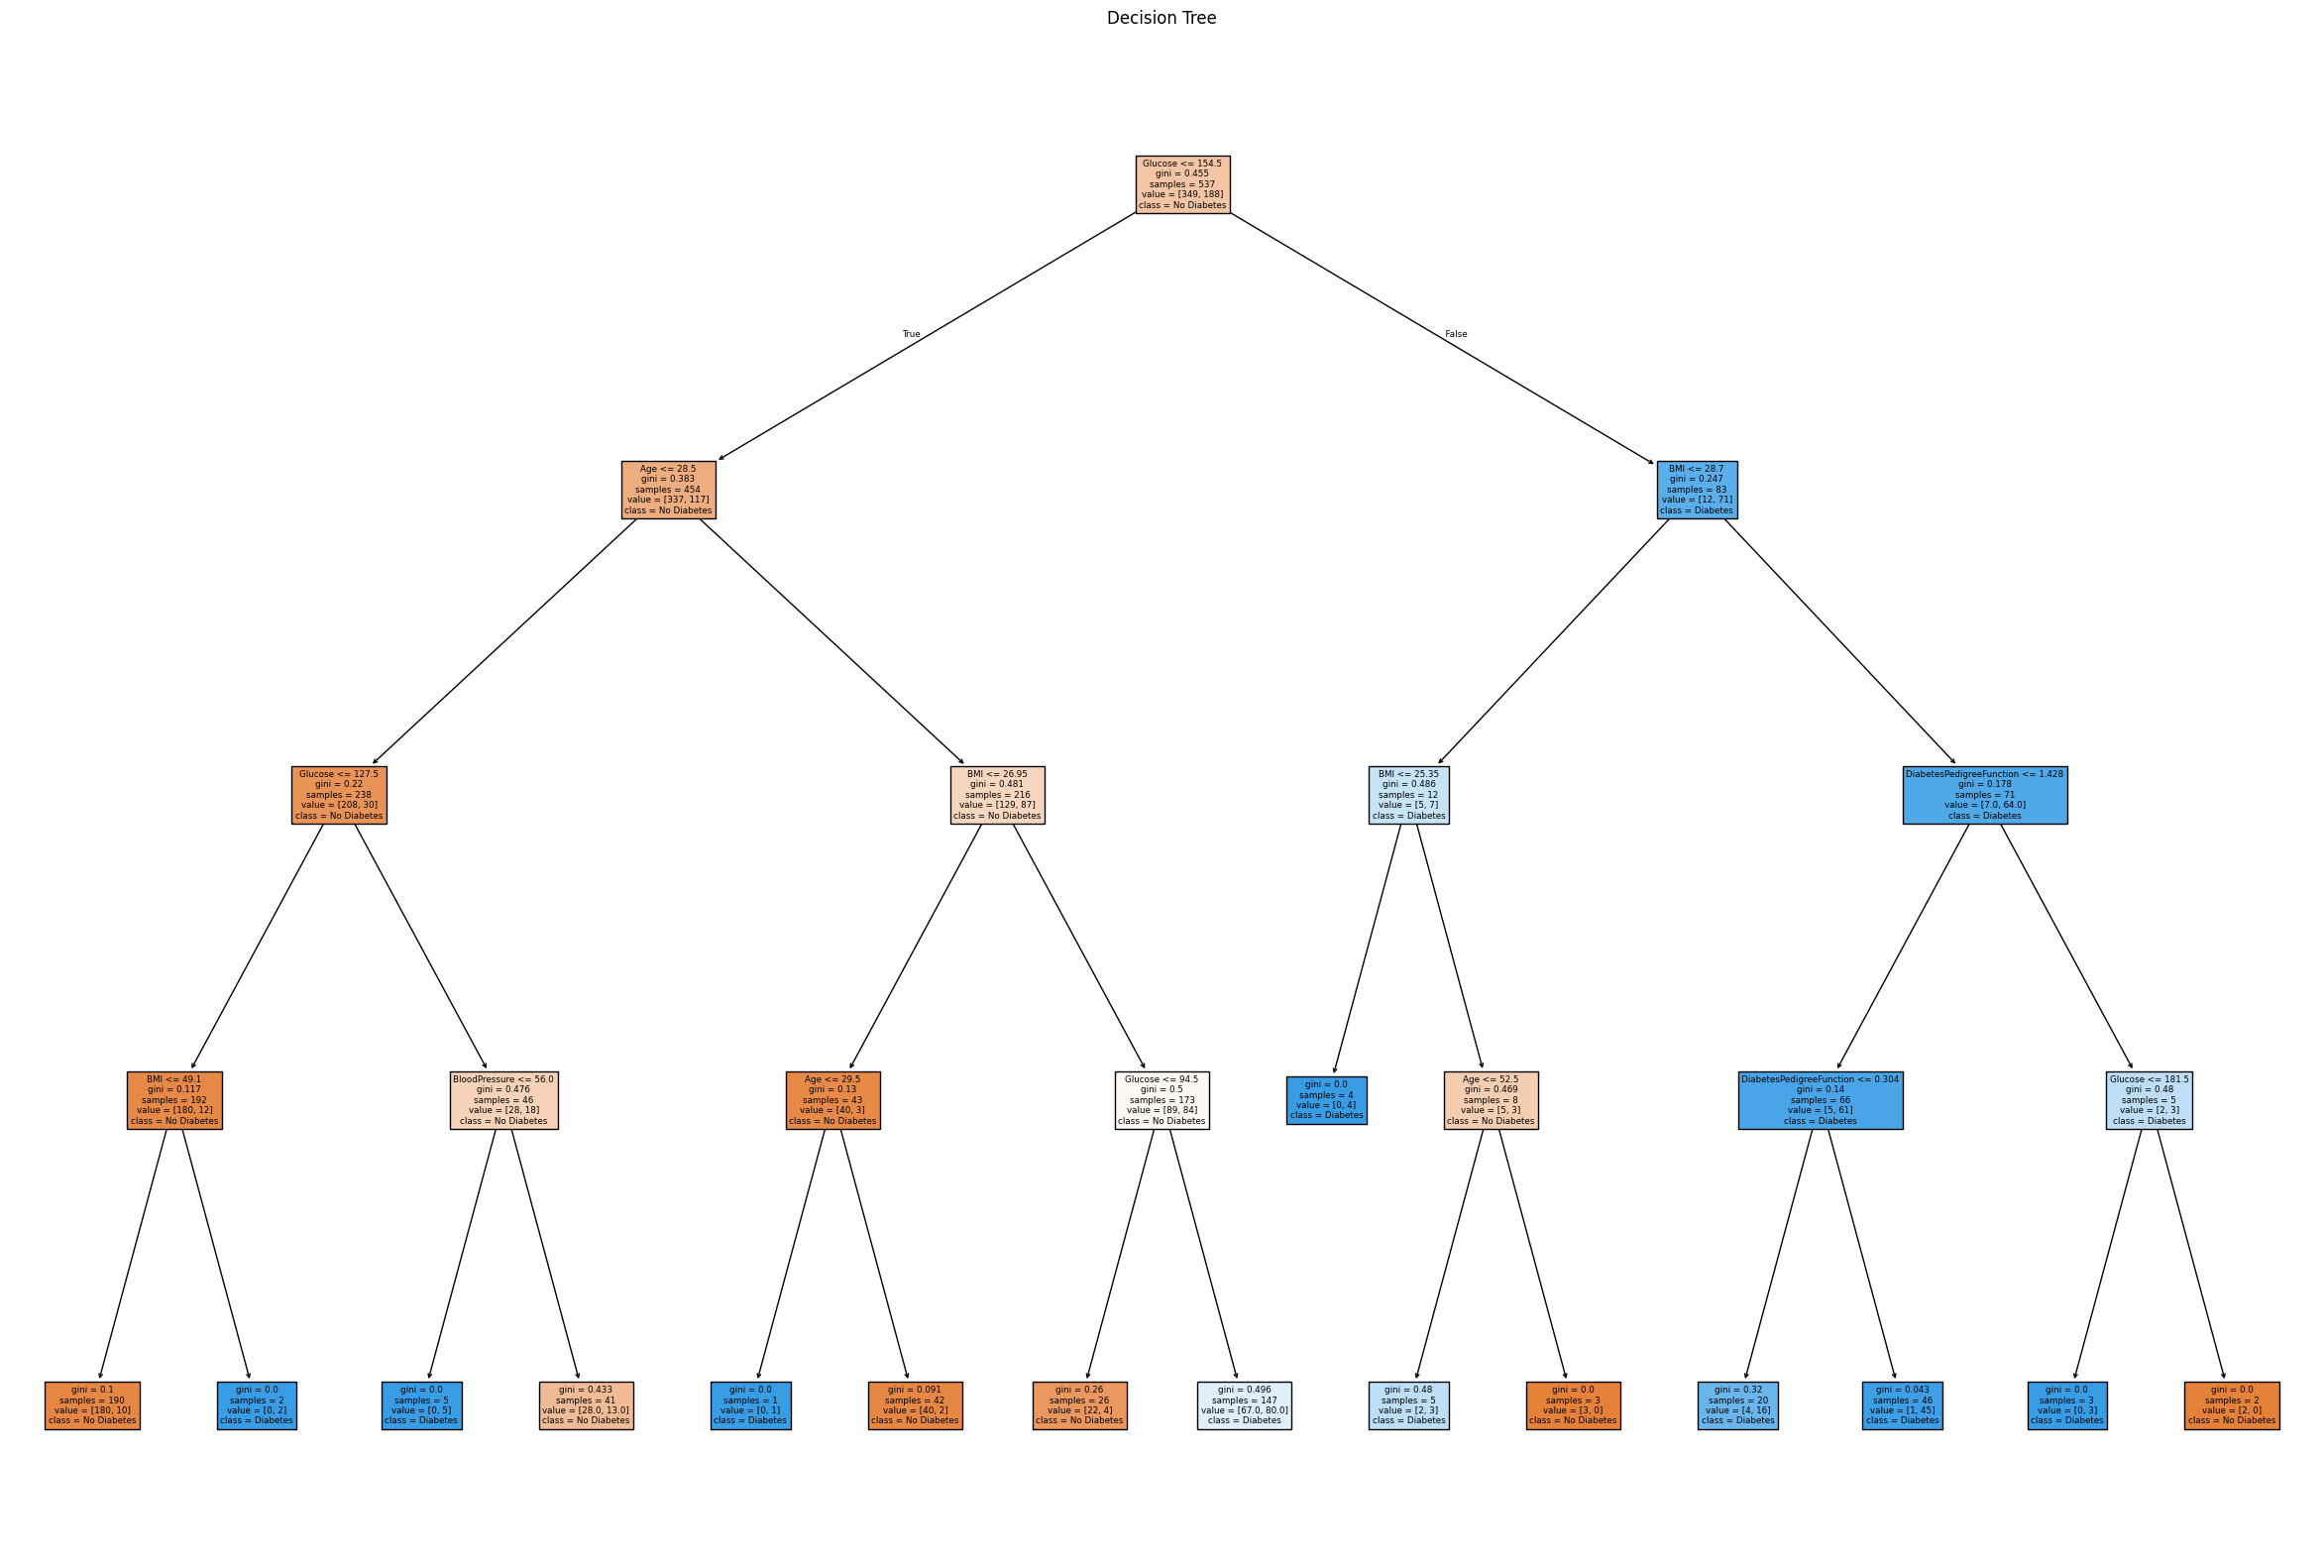

In [110]:
plt.figure(figsize=(30,20))
plot_tree(dt_model, feature_names=X.columns, class_names=['No Diabetes', 'Diabetes'], filled=True)
plt.title('Decision Tree')
plt.show()

##### the first split of the decision tree was on the feature was glucose as it was most important feature in dataset and it was chosen becaise it had highest information gain

## Part D: Comparison & Reflection


### Logistic Regression and Decision Tree results

#### Logistic Regression Metrics
###### accuracy: 0.7359307359307359
###### precision: 0.6172839506172839
###### recall: 0.625
###### f1: 0.6211180124223602
#### Decision Tree Metrics
###### accuracy: 0.7359307359307359
###### precision: 0.6172839506172839
###### recall: 0.625
###### f1: 0.6211180124223602

#### Q. Which model performs better?
##### A.Both models performed equally well in terms of accuracy, precision, recall and f1-score.

#### Q. Which model is easier to interpret for doctors?
##### A. Decision tree, as it is easier to visualize and understand the decision-making process.

#### Q.If the dataset is slightly imbalanced (more 0’s than 1’s), which metric (Precision or Recall) should be prioritized in diagnosing diabetes? Why?
##### A. Recall Should be prioritised , as it is more important to detect the patients with diabetes, even if it means a few false positives.